## Hughes and Hase Problem 8.4: Is this British national lottery fair?

Test the hypothesis that the distribution of numbered balls in 106 drawings of the 
British Lottery is uniform.

Use the procedure outlined at top of p.112 in Hughes and Hase, 2and calculate the 
$\chi^2$ statistic: 

$$
\chi^2 = \sum_i \frac{(O_i - E_i)^2}{E_i}
$$

where $O_i$ represents the number of occurrences of something in the sample data, and $E_i$ gives the expected number of occurrences
based on the null hypothesis.

In [1]:
import numpy as np
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Following is an Ipython magic command that puts figures in notebook.
%matplotlib notebook
        
# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
plt.style.use('classic')
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot params for new size

#### Data set

In [3]:
data = np.array([11,11,13,14,11,22,15,9,9,16,\
                 17,12,8,13,8,15,9,13,19,9,\
                 12,10,17,13,10,9,10,15,9,14,\
                 16,17,11,13,14,11,13,21,14,13,\
                 12,11,16,13,10,18,16,16,8])
np.mean(data), np.sum(data), 106*6, len(data)

(12.979591836734693, 636, 636, 49)

### Formulate the null hypothesis
The distribution is uniform.

#### Calculate expected number of occurrences based on null hypothesis 

Let's consider the probability of getting a 9 in a single draw of 6 balls. 
The 9 could the first ball drawn, and the balls 2-6 would be anything else (not 9).
The probability for this is $P_1 = 1/49$.  Or the 9 could be the second ball drawn,
or it could be the third ball drawn, etc. The probability of a 9 being drawn 
in one of the slots is 

$$
P = P_1 + P_2 + P_3 + P_4 + P_5 + P_6 = 6P_1 = \frac{6}{49}.
$$

The expected number 9's in 106 draws is thus

$$
106\times P = 106 \times\frac{6}{49} = 12.98.
$$

Nines aren't special if the numbers are distributed uniformly, the expected 
values ($E_i$) are all the same.

In [4]:
e = 106*6/49*np.ones(49)

#### Obeserved values ($O_i$)
This is the data given by Hughes and Hase in the problem statement.

In [5]:
o = data

#### Make a "histogram" of the observed data along with expectations

<IPython.core.display.Javascript object>


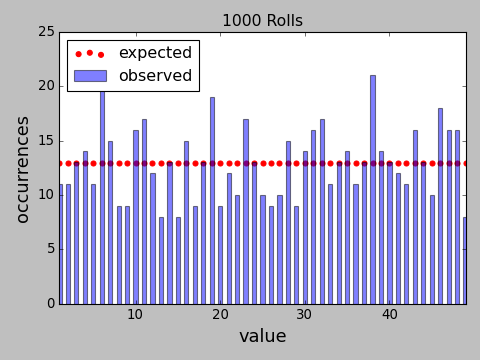

In [6]:
plt.figure()
x = np.linspace(1,49,49)
plt.bar(x, o, label='observed', width=0.5, alpha = 0.5)
plt.scatter(x, e, color='red', label='expected')
plt.xlabel('value')
plt.ylabel('occurrences')
plt.title('1000 Rolls')
plt.xlim(1,49)
plt.legend(loc='upper left');

#### Calculate $\chi^2$ statistic

In [7]:
chi2_data = np.sum((o-e)**2/e)
print('chi2 = ',chi2_data)
print('reduced chi2 = ',chi2_data/49)

chi2 =  42.29559748427673
reduced chi2 =  0.8631754588627905


#### Calculate the probability of getting a value of $\chi^2$ greater than value determined from data

In [8]:
p = 1 - stats.chi2.cdf(chi2_data, 49)
print('probability of getting value of chisq greater than ',chi2_data,'is ',p)

probability of getting value of chisq greater than  42.29559748427673 is  0.7397760005818537


#### Our value of $\chi^2$ is very reasonable.  Don't reject null hypothesis based on this data.

#### Version information
`version_information` is from J.R. Johansson (jrjohansson at gmail.com); see <a href='http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb'>Introduction to scientific computing with Python</a> for more information and instructions for package installation.

`version_information` is installed on the linux network at Bucknell

In [9]:
%load_ext version_information

In [10]:
%version_information numpy, scipy, matplotlib


Software versions
Python 3.7.8 64bit [GCC 7.5.0]
IPython 7.17.0
OS Linux 3.10.0 1062.9.1.el7.x86_64 x86_64 with centos 7.8.2003 Core
numpy 1.19.1
scipy 1.5.0
matplotlib 3.3.0
Sat Aug 22 11:33:42 2020 EDT